# Illustration of a Tomek link

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("poster")

In [2]:
def make_plot_despine(ax):
    sns.despine(ax=ax, offset=10)
    ax.set_xlim([0, 3])
    ax.set_ylim([0, 3])
    ax.set_xlabel(r"$X_1$")
    ax.set_ylabel(r"$X_2$")
    ax.legend(loc="lower right")

generate some toy data



In [3]:
import numpy as np

rng = np.random.RandomState(18)

X_minority = np.transpose(
    [[1.1, 1.3, 1.15, 0.8, 0.55, 2.1], [1.0, 1.5, 1.7, 2.5, 0.55, 1.9]]
)
X_majority = np.transpose(
    [
        [2.1, 2.12, 2.13, 2.14, 2.2, 2.3, 2.5, 2.45],
        [1.5, 2.1, 2.7, 0.9, 1.0, 1.4, 2.4, 2.9],
    ]
)

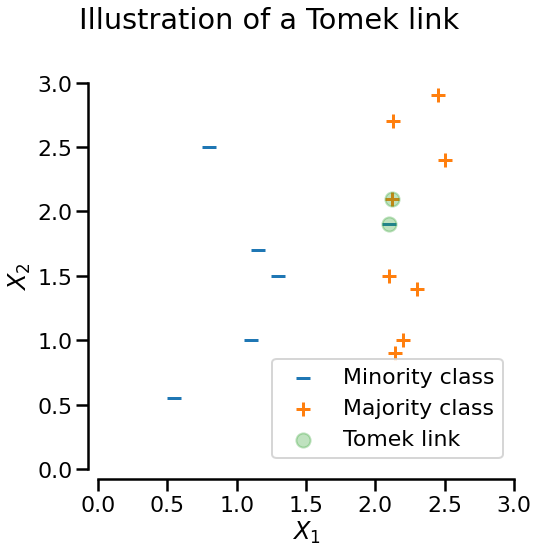

In [4]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(
    X_minority[:, 0],
    X_minority[:, 1],
    label="Minority class",
    s=200,
    marker="_",
)
ax.scatter(
    X_majority[:, 0],
    X_majority[:, 1],
    label="Majority class",
    s=200,
    marker="+",
)

# highlight the samples of interest
ax.scatter(
    [X_minority[-1, 0], X_majority[1, 0]],
    [X_minority[-1, 1], X_majority[1, 1]],
    label="Tomek link",
    s=200,
    alpha=0.3,
)
make_plot_despine(ax)
fig.suptitle("Illustration of a Tomek link")
fig.tight_layout()

In the figure above, the samples highlighted in green form a Tomek link since
they are of different classes and are nearest neighbors of each other.

Run the TomekLinks sampling to remove the corresponding samples. If `sampling_strategy='auto'` only the sample from the majority class will be removed. If `sampling_strategy='all'` both samples will be removed.

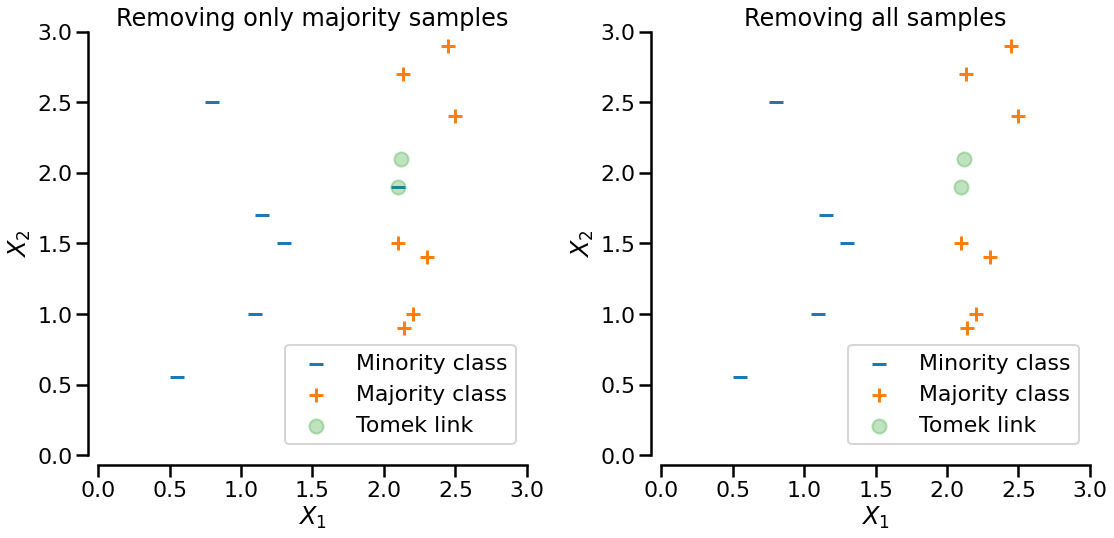

In [5]:
from imblearn.under_sampling import TomekLinks

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

samplers = {
    "Removing only majority samples": TomekLinks(sampling_strategy="auto"),
    "Removing all samples": TomekLinks(sampling_strategy="all"),
}

for ax, (title, sampler) in zip(axs, samplers.items()):
    X_res, y_res = sampler.fit_resample(
        np.vstack((X_minority, X_majority)),
        np.array([0] * X_minority.shape[0] + [1] * X_majority.shape[0]),
    )
    ax.scatter(
        X_res[y_res == 0][:, 0],
        X_res[y_res == 0][:, 1],
        label="Minority class",
        s=200,
        marker="_",
    )
    ax.scatter(
        X_res[y_res == 1][:, 0],
        X_res[y_res == 1][:, 1],
        label="Majority class",
        s=200,
        marker="+",
    )

    # highlight the samples of interest
    ax.scatter(
        [X_minority[-1, 0], X_majority[1, 0]],
        [X_minority[-1, 1], X_majority[1, 1]],
        label="Tomek link",
        s=200,
        alpha=0.3,
    )

    ax.set_title(title)
    make_plot_despine(ax)
fig.tight_layout()

plt.show()